# 反爬：驗證碼處理

* 了解「驗證碼機制」的反爬蟲機制
* 「驗證碼機制」反爬蟲的因應策略


## 作業目標

* 讀讀看「test」資料夾下的圖檔！
* 像 test/test2.png 這種複雜的圖片怎麼辦？


### 讀讀看「test」資料夾下的圖檔！

In [ ]:
#https://github.com/ChenKuanHua/1st-PyCrawlerMarathon/blob/master/homework/Day032_HW.ipynb
#安裝
!pip install pytesseract 
!pip install opencv-python

In [2]:
import requests
import pytesseract
from PIL import Image 
from io import BytesIO ## StringIO和BytesIO是在内存中操作str和bytes的方法

In [2]:
'''
Your Code
'''
img = Image.open("D32：反爬：驗證碼處理_圖1_test1.png")
# img = Image.open("test/test1.png")

# 要先指定Tesseract-OCR路徑才可以成功
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'
# pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# 用pytesseract解析
code = pytesseract.image_to_string(img)
print(code)

619121


### 像 test/test2.png 這種複雜的圖片怎麼辦？

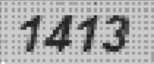

In [4]:
img = Image.open("D32：反爬：驗證碼處理_圖2_test2.png").convert("L")
# img = Image.open("test/test2.png").convert("L")
img

# 轉換圖片色彩模式有：1，L，P，RGB，RGBA，CMYK，YCbCr，I，F。這個網站有詳細範例
# https://blog.csdn.net/icamera0/article/details/50843172
# 模式“1”为二值图像，非黑即白。但是它每个像素用8个bit表示，0表示黑，255表示白。下面我们将lena图像转换为“1”图像
# 模式“L”为灰色图像，它的每个像素用8个bit表示，0表示黑，255表示白，其他数字表示不同的灰度。在PIL中，从模式“RGB”转换为“L”模式是按照下面的公式转换的：L = R 299/1000 + G 587/1000+ B * 114/1000
# 模式“P”为8位彩色图像，它的每个像素用8个bit表示，其对应的彩色值是按照调色板查询出来的。

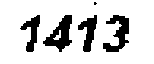

In [5]:
'''
Your Code
'''
pixels = img.load()
standard=127.5
for x in range(img.width):
    for y in range(img.height):
        if pixels[x, y] > standard:
            pixels[x, y] = 255
        else:
            pixels[x, y] = 0
img

In [6]:
code = pytesseract.image_to_string(img)
print(code)

1413


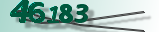

In [3]:
import urllib
from PIL import Image 
# 這個驗證碼的網址，每一次連都抓到不一樣的圖案 @_@
firstbank_imgurl = 'https://ebank.firstbank.com.tw/PTLB2C/CaptchaServlet?regen=Y&timestamp=1578634525841'

#不能用中文路徑
img = urllib.request.urlretrieve(firstbank_imgurl, './D32_Data/imgtest.png')
# Img = urllib.request.urlretrieve(firstbank_imgurl, '../D32_反爬_驗證碼處理Data/imgtest.png')
img = Image.open('./D32_Data/imgtest.png')
# Img = Image.open('../D32_反爬_驗證碼處理Data/imgtest.png')
img

In [5]:
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'
parseImg = pytesseract.image_to_string(img)
parseImg

''

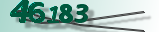

In [8]:
img

In [9]:
pixdata = img.load()  #<PixelAccess at 0x2bdfc313f90>
pixdata

In [13]:
w ,h = img.size
for y in range(h):
    for x in range(w):
        if pixdata[x,y] < 180:
            pixdata[x,y] = 0
        else:
            pixdata[x,y] = 255
Img
#=========
# pixels = img.load()
# standard=127.5
# for x in range(img.width):
#     for y in range(img.height):
#         if pixels[x, y] > standard:
#             pixels[x, y] = 255
#         else:
#             pixels[x, y] = 0
# img

TypeError: '<' not supported between instances of 'tuple' and 'int'

In [11]:
# 對二值化圖片降噪
pixdata = img.load()
w,h = img.size
# 8鄰域演算法
for y in range(1,h-1):
    for x in range(1,w-1):
        count = 0
        if pixdata[x,y-1] > 245:#上
            count = count + 1
        if pixdata[x,y+1] > 245:#下
            count = count + 1
        if pixdata[x-1,y] > 245:#左
            count = count + 1
        if pixdata[x+1,y] > 245:#右
            count = count + 1
        if pixdata[x-1,y-1] > 245:#左上
            count = count + 1
        if pixdata[x-1,y+1] > 245:#左下
            count = count + 1
        if pixdata[x+1,y-1] > 245:#右上
            count = count + 1
        if pixdata[x+1,y+1] > 245:#右下
            count = count + 1
        if count > 4:
            pixdata[x,y] = 255

img

TypeError: '>' not supported between instances of 'tuple' and 'int'

In [7]:
import cv2
import matplotlib.pyplot as plt

In [14]:
cv2.__version__

'4.2.0'

In [15]:
img = cv2.imread('./D32_Data/imgtest.png')
img

array([[[206, 216, 172],
        [206, 216, 172],
        [206, 216, 172],
        ...,
        [252, 252, 250],
        [252, 252, 250],
        [252, 253, 251]],

       [[206, 216, 172],
        [206, 216, 172],
        [206, 216, 172],
        ...,
        [252, 252, 250],
        [252, 253, 250],
        [252, 253, 251]],

       [[206, 216, 172],
        [206, 216, 172],
        [206, 216, 172],
        ...,
        [252, 252, 250],
        [252, 253, 250],
        [252, 253, 251]],

       ...,

       [[207, 217, 174],
        [207, 217, 175],
        [208, 217, 175],
        ...,
        [253, 254, 253],
        [254, 254, 253],
        [254, 254, 254]],

       [[207, 217, 174],
        [207, 217, 175],
        [208, 217, 175],
        ...,
        [253, 254, 253],
        [254, 254, 253],
        [254, 254, 254]],

       [[207, 217, 174],
        [208, 217, 175],
        [208, 217, 175],
        ...,
        [254, 254, 253],
        [254, 254, 253],
        [254, 254, 254]]

In [16]:
dst = cv2.fastNlMeansDenoisingColored(img, None, 30, 30, 7, 21)
dst

array([[[206, 216, 174],
        [206, 216, 174],
        [206, 216, 174],
        ...,
        [252, 253, 247],
        [252, 253, 247],
        [252, 253, 247]],

       [[206, 216, 174],
        [206, 216, 174],
        [206, 216, 174],
        ...,
        [252, 253, 247],
        [252, 253, 247],
        [252, 253, 247]],

       [[206, 216, 174],
        [206, 216, 174],
        [206, 216, 174],
        ...,
        [252, 253, 247],
        [252, 253, 247],
        [252, 253, 247]],

       ...,

       [[208, 218, 176],
        [208, 218, 176],
        [208, 218, 176],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[208, 218, 176],
        [208, 218, 176],
        [208, 218, 176],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[208, 218, 176],
        [208, 218, 176],
        [208, 218, 176],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]]

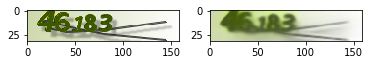

In [17]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)